# Quantum Random Number Generator

## Import all necessary libraries

In [1]:
%matplotlib inline
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, Aer, execute, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import plot_state_city
import matplotlib.pyplot as plt
import numpy as np
print("All libraries imported successfully!")

All libraries imported successfully!


In [2]:
def real_map(value, leftMin, leftMax, rightMin, rightMax):
    # Calculate the spans of the input and output ranges
    leftSpan = leftMax - leftMin
    rightSpan = rightMax - rightMin

    # Scale the value to the 0-1 range
    valueScaled = (value - leftMin) / leftSpan

    # Map the value to the output range
    mappedValue = rightMin + (valueScaled * rightSpan)

    return mappedValue

0: 84.61538461538461
1: 53.84615384615385
2: 46.15384615384615
3: 53.84615384615385
4: 30.76923076923077
5: 69.23076923076923
6: 69.23076923076923
7: 30.76923076923077
8: 84.61538461538461
9: 53.84615384615385
10: 76.92307692307693
11: 76.92307692307693
12: 84.61538461538461
13: 69.23076923076923
14: 69.23076923076923
15: 53.84615384615385
16: 76.92307692307693
17: 30.76923076923077
18: 61.53846153846154
19: 61.53846153846154
20: 84.61538461538461
21: 84.61538461538461
22: 53.84615384615385
23: 53.84615384615385
24: 76.92307692307693
25: 76.92307692307693
26: 61.53846153846154
27: 69.23076923076923
28: 53.84615384615385
29: 53.84615384615385
30: 61.53846153846154
31: 46.15384615384615
32: 30.76923076923077
33: 84.61538461538461
34: 76.92307692307693
35: 30.76923076923077
36: 84.61538461538461
37: 38.46153846153847
38: 69.23076923076923
39: 76.92307692307693
40: 46.15384615384615
41: 46.15384615384615
42: 38.46153846153847
43: 38.46153846153847
44: 30.76923076923077
45: 84.6153846153846

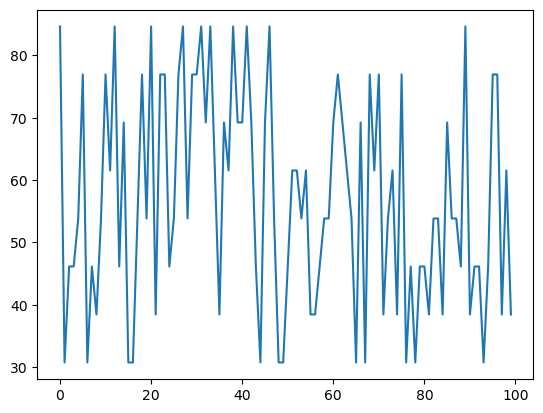

In [5]:
def QRandom(a, b):
    qubits = 3  # Set the number of qubits to 3
    q = QuantumRegister(qubits, 'q')
    circ = QuantumCircuit(q)
    c0 = ClassicalRegister(qubits, 'c0')
    circ.add_register(c0)

    for i in range(qubits):
        circ.h(q[i])

    for i in range(qubits):
        circ.measure(q[i], c0[i])

    backend = Aer.get_backend('statevector_simulator')
    job = execute(circ, backend)
    result = job.result()
    output = result.get_statevector(circ, decimals=5)

    n1 = 0
    n2 = 0
    n3 = 0
    for i in range(len(output)):
        if abs(output[i]) != 0:
            n1 = i
            n2 = np.real(output[i])
            n3 = np.imag(output[i])

    y = real_map(n1 + n2 + n3, -qubits, len(output) - 1 + qubits, a, b)
    plot_state_city(output)
    return y

x = []
for i in range(100):
    x.append(QRandom(0, 100))
    print(str(i) + ": " + str(QRandom(0, 100)))

plt.plot(x)
plt.show()


0: 52.0
1: 45.33333333333333
2: 50.66666666666667
3: 53.333333333333336
4: 78.66666666666666
5: 37.333333333333336


KeyboardInterrupt: 

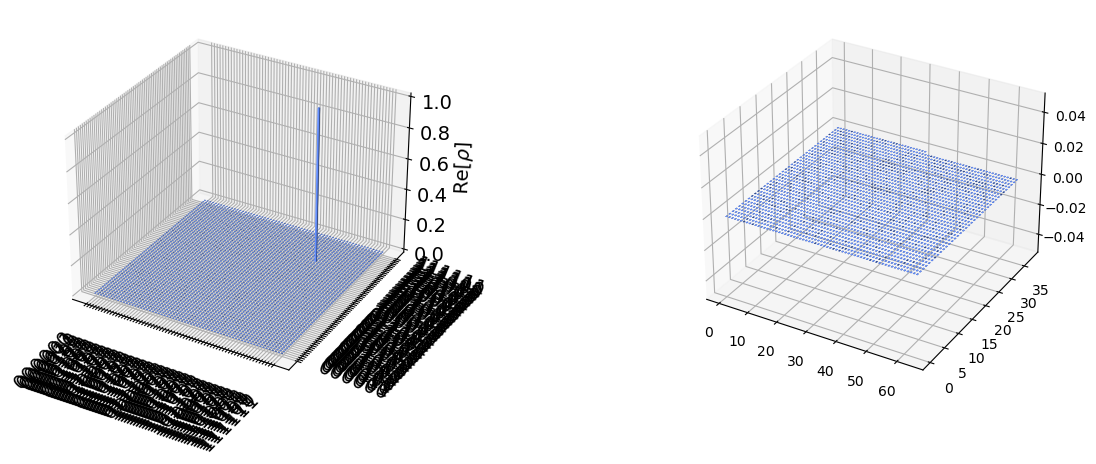

In [9]:
def QRandom(a, b):
    qubits = 6  # Set the number of qubits to 6
    q = QuantumRegister(qubits, 'q')
    circ = QuantumCircuit(q)
    c0 = ClassicalRegister(qubits, 'c0')
    circ.add_register(c0)

    for i in range(qubits):
        circ.h(q[i])

    for i in range(qubits):
        circ.measure(q[i], c0[i])

    backend = Aer.get_backend('statevector_simulator')
    job = execute(circ, backend)
    result = job.result()
    output = result.get_statevector(circ, decimals=5)

    n1 = 0
    n2 = 0
    n3 = 0
    for i in range(len(output)):
        if abs(output[i]) != 0:
            n1 = i
            n2 = np.real(output[i])
            n3 = np.imag(output[i])

    y = real_map(n1 + n2 + n3, -qubits, len(output) - 1 + qubits, a, b)
    plot_state_city(output)
    return y

x = []
for i in range(100):
    x.append(QRandom(0, 100))
    print(str(i) + ": " + str(QRandom(0, 100)))
plt.plot(x)
plt.show()

0: 60.97560975609756
1: 24.390243902439025
2: 36.58536585365854
3: 14.634146341463413
4: 24.390243902439025
5: 17.073170731707318
6: 34.146341463414636
7: 17.073170731707318
8: 36.58536585365854
9: 41.46341463414634
10: 70.73170731707317
11: 65.85365853658537
12: 90.2439024390244
13: 39.02439024390244
14: 80.48780487804879
15: 34.146341463414636
16: 46.34146341463415
17: 39.02439024390244
18: 82.92682926829268
19: 19.51219512195122
20: 31.70731707317073
21: 17.073170731707318
22: 39.02439024390244
23: 34.146341463414636
24: 87.8048780487805
25: 46.34146341463415
26: 17.073170731707318
27: 87.8048780487805
28: 60.97560975609756
29: 14.634146341463413
30: 65.85365853658537
31: 41.46341463414634
32: 43.90243902439025
33: 87.8048780487805
34: 34.146341463414636
35: 48.78048780487805
36: 31.70731707317073
37: 14.634146341463413
38: 34.146341463414636
39: 75.60975609756098
40: 53.65853658536586
41: 21.951219512195124
42: 58.536585365853654
43: 29.268292682926827
44: 36.58536585365854
45: 24.

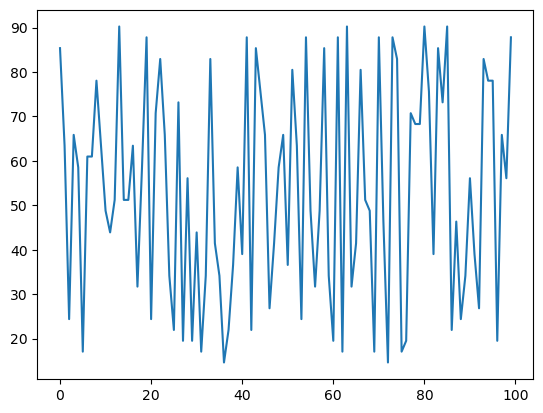

In [10]:
def QRandom(a, b):
    qubits = 5  # Set the number of qubits to 5
    q = QuantumRegister(qubits, 'q')
    circ = QuantumCircuit(q)
    c0 = ClassicalRegister(qubits, 'c0')
    circ.add_register(c0)

    for i in range(qubits):
        circ.h(q[i])

    for i in range(qubits):
        circ.measure(q[i], c0[i])

    backend = Aer.get_backend('statevector_simulator')
    job = execute(circ, backend)
    result = job.result()
    output = result.get_statevector(circ, decimals=5)

    n1 = 0
    n2 = 0
    n3 = 0
    for i in range(len(output)):
        if abs(output[i]) != 0:
            n1 = i
            n2 = np.real(output[i])
            n3 = np.imag(output[i])

    y = real_map(n1 + n2 + n3, -qubits, len(output) - 1 + qubits, a, b)
    plot_state_city(output)
    return y

x = []
for i in range(100):
    x.append(QRandom(0, 100))
    print(str(i) + ": " + str(QRandom(0, 100)))
plt.plot(x)
plt.show()

## Analysis and Conclusion

I ran the algorithm twice, once using 3 qubits and once using 6. The values that the algorithms came up with seem random to the naked eye, especially when looking at the plots. Additionally, when run multiple times, the random numbers are unique. Comparing the randomness of this algorithm to a classical algorithm could be an interesting project to do next.

However, in both trials, it's clear that some values, though randomly generated, repeat multiple times. Upon closer analysis of the plot, it turns out that trial 1 had 8, or 2^3, unique values that were displayed. Counting the number of 

One thing that I found was interesting is that with 6 qubits, before I had to terminate the process because it was slowing my computer down too much, all of the random numbers all had one of three decimal endings, unlike my other trials.